In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
glass_data = pd.read_csv('glass.csv')
glass_data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [3]:
glass_data.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC

In [5]:
train,test = train_test_split(glass_data,test_size=0.2)

In [6]:
acc = []

for i in range(3,30,2):
    model = KNC(n_neighbors=i)
    model.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc=np.mean(model.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc=np.mean(model.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])

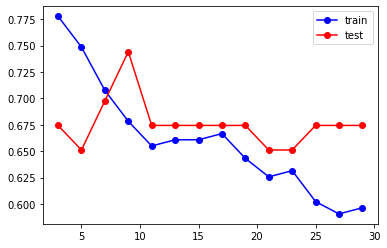

In [7]:
# train accuracy plot 
plt.plot(np.arange(3,30,2),[i[0] for i in acc],"bo-")

# test accuracy plot
plt.plot(np.arange(3,30,2),[i[1] for i in acc],"ro-")

plt.legend(["train","test"])